# Assignment - 1
Group No: 22; 
Deep Singh     251122489,
Mandeep Singh  251122474,
Sanket Salunke 251102392

#### Dependencies
First of all, we will import the libraries for the basic requirements such as mathematical calculations, plotting graphs, data visualization, etc and then we will import question specific libraries.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

import datetime                                  #Q10
import tracemalloc 

import scipy.stats as stats

from glob import glob                             #Q1

from sklearn.feature_selection import SelectKBest #Q2
from sklearn.feature_selection import chi2

from scipy.stats import norm                      #Q3
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA             #Q3c
from sklearn.preprocessing import StandardScaler

from scipy.stats import multivariate_normal       #Q5

from sklearn.metrics import f1_score              #Q6
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split # Q8
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

from sklearn.cluster import KMeans #Q9

%matplotlib inline

# Data Preparation

###  Question 1 -  Filter all "Normal Experiments" by taking into account only active examples "SDS Armed = 1", and then, merge them in a new file named as "merged_exp_normal.csv".
Our first step is to read all the csv files available in the 'Normal_Experiments' folder and after that we will merge all the csv files into one consolidated file.

With help of the Pandas DataFrame head() function, we will quickly test if the merged file has the right type of data in it by looking at the first few rows.

In [2]:
path = r'C:\Users\dpsin\GitHub\ECE9039_Assignment1\Normal_Experiments' #specifying path
all_files = glob(path + "/*.csv")                                      #use glob function to create wildcard for all file names
li = []                                                                #empty list to store file 
for filename in all_files:                                             #read all files using iteration
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)                                                      
frame = pd.concat(li, axis=0, ignore_index=True)                       #merge files into one
frame.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Sds_Armed,Anomaly_Tag
0,0.006286,0.011072,0.088714,0.036855,0.12677,0.22329,1.7891,0.74325,0,0
1,0.008937,0.015274,0.119970,0.051323,0.18024,0.30803,2.4193,1.03500,0,0
2,0.012156,0.019694,0.150640,0.064529,0.24514,0.39717,3.0379,1.30130,0,0
3,0.015202,0.024273,0.179940,0.075763,0.30658,0.48950,3.6288,1.52790,0,0
4,0.017572,0.028237,0.208750,0.087763,0.30470,0.48138,3.6888,1.55960,0,0


We can see from the above result that we have the required data in the merged file however, we have to exclude the rows with the column Sds_Armed having value = 0 so that we have only active examples in our file.

After dropping rows with Sds_Armed = 0, we will verify that we have only those rows in our merged file for 'Normal_Experiments' which have column Sds_Armed = 1. After verifying, we will export and save the merged file with name 'merged_exp_normal.csv' in our local directory.

In [3]:
index = frame[frame['Sds_Armed'] == 0].index                                #find rows with SDs_Armed=0
frame.drop(index, inplace = True)                                           #drop rows with SDs_Armed=0
# Export merged file to local directory with name 'merged_exp_normal.csv'
frame.to_csv(r'C:\Users\dpsin\GitHub\ECE9039_Assignment1\merged_exp_normal.csv') #export file

#verify Sds_armed=1
frame.head()                                                                     #verify remaining data for SDs_Armed=1

,X1,X2,X3,X4,X5,X6,X7,X8,Sds_Armed,Anomaly_Tag
622,0.42051,0.73265,6.0160,1.4258,0.22390,0.44638,4.9892,1.3106,1,0
623,0.41743,0.72691,6.0102,1.4259,0.21750,0.44326,5.0469,1.3243,1,0
624,0.41608,0.72337,6.0093,1.4254,0.21875,0.44661,5.0830,1.3227,1,0
625,0.41517,0.72154,6.0002,1.4261,0.23488,0.46345,4.9672,1.3509,1,0
626,0.41376,0.71773,5.9814,1.4257,0.25363,0.48208,4.8346,1.3580,1,0


### Question 2 - Filter all "Experiments with Anomalies" by taking into account only active examples "SDS Armed = 1"  and then, merge them in a new file named as "merged_exp_contains_anomalies.csv".

Similar to steps for question 1, we will read all the files from folder 'Experiments_with_Anomalies' and merge them into single file. After that we will figure out the rows with Sds_Armed = 0 and drop those rows from the merged file. After verifying the file, we will export the merged file to our local directory with name 'merged exp contains anomalies.csv'.

In [4]:
# Read all 'Experiments_with_Anomalies' files
path = r'C:\Users\dpsin\GitHub\ECE9039_Assignment1\Experiments_with_Anomalies' #specifying path
all_files = glob(path + "/*.csv")                                              #use glob function to create wildcard for all file names
li = []                                                                        #empty list to store file 

# Merge all 'Experiments_with_Anomalies' files into one merged file
for filename in all_files:                                                     #read all files using iteration
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)                                                      
frame = pd.concat(li, axis=0, ignore_index=True)                               #merge files into one
index = frame[frame['Sds_Armed'] == 0].index                                   #find rows with SDs_Armed=0
frame.drop(index, inplace = True)                                              #drop rows with SDs_Armed=0
frame.to_csv(r'C:\Users\dpsin\GitHub\ECE9039_Assignment1\merged_exp_contains_anomalies.csv') #export file

In [5]:
#verify Sds_armed=1
frame.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Sds_Armed,Anomaly_Tag
745,1.7957,6.1964,508.57,875.40,0.43922,1.5473,57.021,56.914,1,0
746,1.7851,6.1508,503.90,867.18,0.43947,1.3525,53.658,58.856,1,0
747,1.7760,6.1173,499.62,860.56,0.42528,1.3391,52.551,69.101,1,0
748,1.7641,6.0799,494.07,851.51,0.42802,1.3679,51.228,75.935,1,0
749,1.7525,6.0333,486.73,840.86,0.40701,1.3128,47.228,72.784,1,0


###### Preparing dataset

In [6]:
#Anomalous Dataset
dfa = pd.read_csv("merged_exp_contains_anomalies.csv")
dfa = dfa.drop(dfa.columns[[0,9]], axis = 1)

#Normal Dataset
dfn = pd.read_csv("merged_exp_normal.csv")
dfn = dfn.drop(dfn.columns[[0,9]], axis = 1)

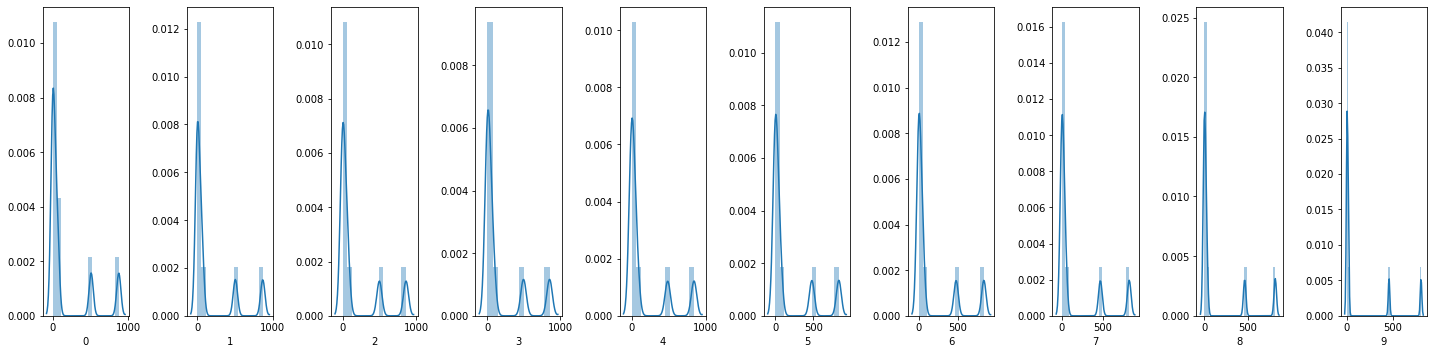

In [7]:
#viewing anomalous dataset shapes
f, axes = plt.subplots(1, 10,figsize=(20,5))
for i in range(0,10):
    sns.distplot(dfa.iloc[i],ax=axes[i])
    f.tight_layout(pad=1)
plt.show()

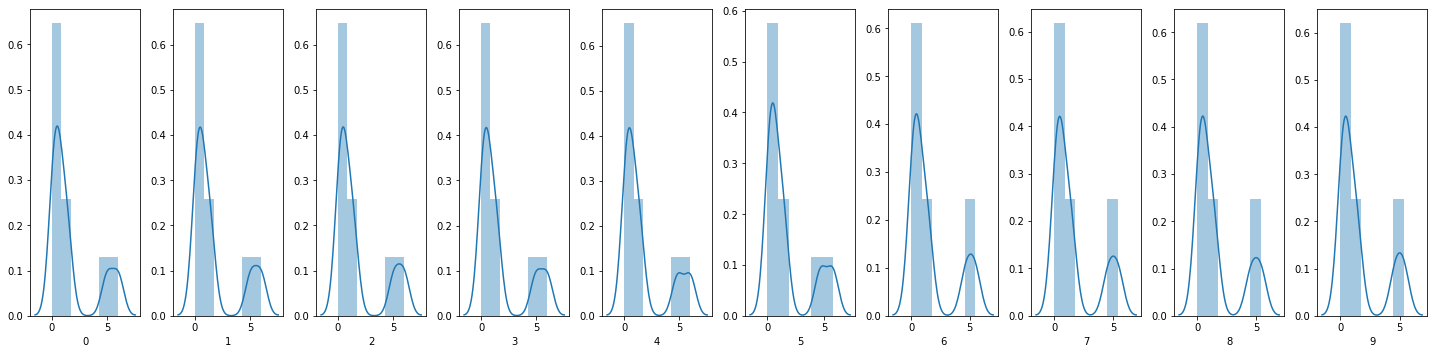

In [8]:
#viewing normal dataset shapes
f, axes = plt.subplots(1, 10,figsize=(20,5))
for i in range(0,10):
    sns.distplot(dfn.iloc[i],ax=axes[i])
    f.tight_layout(pad=1)
plt.show()

In [9]:
#Seperating features and targets
X_a = dfa.iloc[:,0:8]                #Features columns for anomalous
Y_a = pd.DataFrame(dfa.iloc[:,-1])   #target column for anomalous

X_n = dfn.iloc[:,0:8]                #Features columns for normal
Y_n = pd.DataFrame(dfn.iloc[:,-1])   #target column for normal

# Building A Statistical-Based Anomaly Detection Algorithm

### Question 3 - Since the merged exp contains anomalies.csv contains anomalies, apply any significance test to rank the significance of each feature (X1, X2, ..., X8) as being a distinctive feature of anomalies.

We will be using SelectKBest to rank the features and will combine rank and feature names to print the list of features' ranks using SelectKBest.

In [10]:
#features ranking using selectkbest
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_a,Y_a)

dfscores = pd.DataFrame(fit.scores_) #generate feature score
dfcolumns = pd.DataFrame(X_a.columns)  #extract feature name

#combine rank and feature name
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #Headings

print(featureScores.nlargest(8,'Score'))  #print score

  Specs         Score
3    X4  27179.742048
2    X3  20765.545612
7    X8  19890.345351
5    X6   3277.365923
4    X5   1023.073345
1    X2    583.152894
0    X1    568.161416
6    X7    287.134248


### Question 4 - Model the normal process “merged exp normal.csv” using Gaussian distribution. Assume that the features are independent.

We will generate mean and standard deviation and use these values to generate the pdf functions.

In [11]:
# Generating Mean and Standard Deviation
def para(x):
    mu=np.mean(x)
    sigma=np.std(x)
    var=np.var(x)
    print("mu:",mu,"\n","sigma:",sigma, "\n","var:",var)
    return mu,sigma,var

In [12]:
#Function to generate PDF functions
def gaus(mu, sigma, range):
    start = (mu - 3*sigma)
    stop = (mu + 3*sigma)
    x = np.linspace(start,stop, range)    
    pdf = norm.pdf(x,mu,sigma)
    return pdf,x

### a. Consider all features (X1 to X8)

In [13]:
# Mean and standard deviation for Normal Dataset
mu_n,sigma_n,var_n=para(X_n.to_numpy())

mu: 2.8788086219487576 
 sigma: 8.848727756020653 
 var: 78.29998290017028


In [14]:
#Generating PDF function
pdf_n,x=gaus(mu_n,sigma_n, len(X_n))

In [15]:
print('pdfmin: ',pdf_n.min(), ",pdfmax: ",pdf_n.max())

pdfmin:  0.000500845831642022 ,pdfmax:  0.045084704979498604


### b. Mark the most important two features
Feature X3 and X4 are most important feature as per score obtained in question 3

#### X4  27179.742048
#### X3  20765.545612

In [16]:
#for individual features
def gaus_8(mu, sigma, r1, r2):
    f, axes = plt.subplots(1, figsize=(10,5))
    for i in range(r1, r2):
        start = (mu[i] - 3*sigma[i])
        stop = (mu[i] + 3*sigma[i])
        x = np.linspace(start,stop)    
        pdf = norm.pdf(x,mu[i],sigma[i])
        axes = plt.gca()                 #get current axis
        axes.set_xlim([-0.25,0.25])
        plt.plot(x, pdf, label=('X',i+1))
        plt.title("Probability Distribution")
        plt.legend()
    plt.show()
    return pdf

In [17]:
#Scaling dataset from 0 to 1 range for better view of individual component
scaledXn = pd.DataFrame(MinMaxScaler().fit_transform(X_n),columns=X_n.columns)

In [18]:
#Based on individual features
mu_2n,sigma_2n,var_2n=para(scaledXn)

mu: X1    0.029275
X2    0.029062
X3    0.019698
X4    0.024321
X5    0.005750
X6    0.005258
X7    0.008949
X8    0.012658
dtype: float64 
 sigma: X1    0.031335
X2    0.036432
X3    0.040718
X4    0.040554
X5    0.014747
X6    0.016393
X7    0.025223
X8    0.025900
dtype: float64 
 var: X1    0.000982
X2    0.001327
X3    0.001658
X4    0.001645
X5    0.000217
X6    0.000269
X7    0.000636
X8    0.000671
dtype: float64


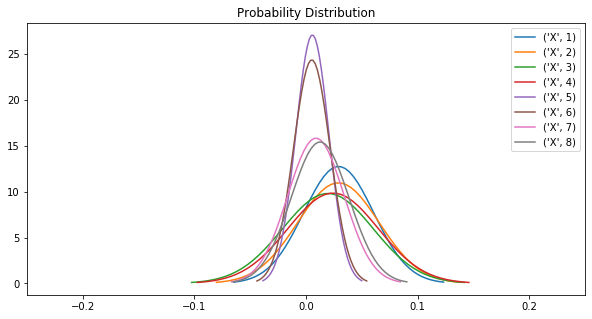

In [19]:
#Generating PDF functions based for all invidual features
pdf2n=gaus_8(mu_2n,sigma_2n,0,len(mu_2n))

mu: 5.190242619096064 
 sigma: 10.451719160375186 
 var: 109.23843340735377
pdfmin:  0.0004240305679796813 ,pdfmax:  0.03817001530586199


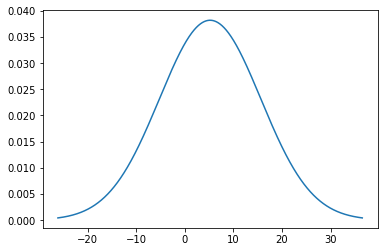

In [20]:
#Generating PDF functions based on only important features X1 and X5
X34=X_n.drop(['X1','X2','X5','X6','X7','X8'], axis = 1)
mu34,sigma34,var34=para(X34.to_numpy())
pdf34,x=gaus(mu34,sigma34,len(X34))
plt.plot(x,pdf34)
print('pdfmin: ',pdf34.min(), ",pdfmax: ",pdf34.max())

### c. Projection of feature space into first two components using PCA

In [21]:
#scaling dataset
scaledset = StandardScaler().fit_transform(dfn) 

In [22]:
# fitting and transforming to principal components
pca = PCA(n_components=2)
prcomps = pca.fit_transform(scaledset)

#verifying the shape
prcomps.shape

(152356, 2)

Text(0, 0.5, 'Principal Component 2')

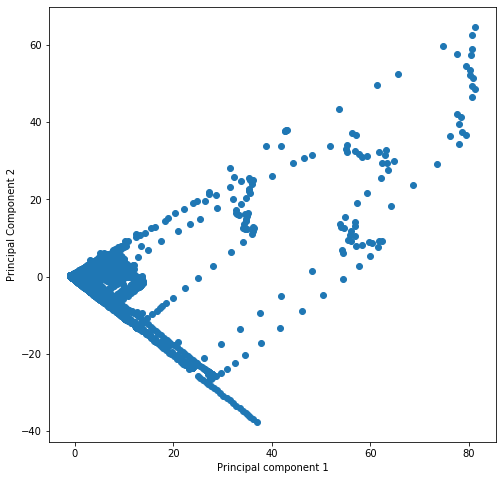

In [23]:
#projecting the feature space
plt.figure(figsize = (8,8))
plt.scatter(prcomps[:,0],prcomps[:,1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal Component 2')

## Question 5 - Model the same normal process “merged exp normal.csv” using Gaussian distribution with all requirements in Question 4. However, assume that the features are dependent.

We will use co variance matrix to generate pdf functions for this case.

In [24]:
#getting covariance matrix
covariance=X_n.cov()
print("Covariance \n",covariance)

Covariance 
           X1        X2          X3         X4        X5         X6  \
X1  0.237127  0.469539    3.827697   1.283360  0.141805   0.280584   
X2  0.469539  0.979348    9.231350   2.875613  0.274458   0.581017   
X3  3.827697  9.231350  193.224368  42.086533  1.956296   5.183251   
X4  1.283360  2.875613   42.086533  12.015223  0.671428   1.567032   
X5  0.141805  0.274458    1.956296   0.671428  0.608147   1.190327   
X6  0.280584  0.581017    5.183251   1.567032  1.190327   2.467874   
X7  2.034031  5.073584  112.064358  22.959798  8.644799  19.680881   
X8  0.717838  1.619127   24.372733   6.651358  2.807354   6.138411   

            X7         X8  
X1    2.034031   0.717838  
X2    5.073584   1.619127  
X3  112.064358  24.372733  
X4   22.959798   6.651358  
X5    8.644799   2.807354  
X6   19.680881   6.138411  
X7  330.801704  75.317589  
X8   75.317589  22.105169  


In [25]:
#generating PDF function
pdfmv=multivariate_normal.pdf(X_n,mu_2n,covariance)
print('pdfmin: ',pdfmv.min(), ",pdfmax: ",pdfmv.max())

pdfmin:  0.0 ,pdfmax:  0.00012910823472035598


In [26]:
pdfmv.shape

(152356,)

## Question 6 - Develop an anomaly alarm by adjusting a threshold epsilon to your Gaussian models obtained in Questions 3 and 4, and accordingly, generate an alarm accordingly.

We will first split the anomaly dataset into test and train using train_test_split and then generate mean and standard deviation for the training set. Then threshold value will be calculated to use it to design the alarm.

In [27]:
#splitting dataset
dfa=pd.read_csv('merged_exp_contains_anomalies.csv')
features=dfa[['X1','X2','X3','X4','X5','X6','X7','X8']]
labels  =dfa['Anomaly_Tag']

x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2, random_state=42)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [28]:
#Mean and standard deviation for x_train
mu_tr,sigma_tr,var_tr=para(x_train.to_numpy())

#PDF for x_train
pdf_tr,x = gaus(mu_tr,sigma_tr,len(x_train))
print('pdfmin: ',pdf_tr.min(), ",pdfmax: ",pdf_tr.max())

mu: 8.695264787260276 
 sigma: 40.45086069135203 
 var: 1636.2721306711687
pdfmin:  0.00010956128834325374 ,pdfmax:  0.009862392844934535


In [29]:
pdf_tr.shape

(36500,)

### Finding threshold value

In [30]:
epsilon,F1,f = 0,0,0

step=(0.00990-0)/100
print('stepsize',step)

stepsize 9.900000000000001e-05


In [31]:
tracemalloc.start()
snapshot1 = tracemalloc.take_snapshot()
a = datetime.datetime.now()

##########################################
for ep in np.arange(0,0.00990,step):
    prediction = (pdf_tr < ep)
    f = f1_score(y_train, prediction, average = "micro")
    if f > F1:
        F1 = f
        epsilon = ep
print ('Predictions:',prediction)
print ('F1 Score', F1)
print ('Epsilon', epsilon)
##########################################

snapshot2 = tracemalloc.take_snapshot()
stats = snapshot2.compare_to(snapshot1,'lineno')
print('Anomaly Detection Training')
print("Memory Usage")
for stat in stats[:1]:
    print(stat)
b = datetime.datetime.now()
print('Time Complexity', b-a)

Predictions: [ True  True  True ...  True  True  True]
F1 Score 0.8583287671232877
Epsilon 0.0
Anomaly Detection Training
Memory Usage
C:\ProgramData\Anaconda3\lib\selectors.py:314: size=144 KiB (+144 KiB), count=3 (+3), average=48.0 KiB
Time Complexity 0:00:02.083903


### Designing Anomaly Alarm with Threshold Value/epsilon = 0.0

In [32]:
def alarm(pdf):
    prediction = (pdf < 0.0)
    f = f1_score(y_test, prediction, average = "micro")
    return prediction,f

In [33]:
#Parameters of Test Data (Mean, standard deviation, Covariance): x_test
mu_test,sigma_test,var_test=para(x_test.to_numpy())

cov_test=X_n.cov()
mu_2t,sigma_2t,var_2t=para(x_test)

mu: 8.528832693540435 
 sigma: 39.607568876507564 
 var: 1568.7595123072904
mu: X1     0.633940
X2     1.816117
X3    26.890898
X4    15.553618
X5     0.610040
X6     1.634985
X7    17.042029
X8     4.049035
dtype: float64 
 sigma: X1     0.239112
X2     2.239751
X3    68.574969
X4    76.605799
X5     0.349667
X6     2.229615
X7    29.008652
X8    20.754607
dtype: float64 
 var: X1       0.057174
X2       5.016485
X3    4702.526421
X4    5868.448484
X5       0.122267
X6       4.971182
X7     841.501890
X8     430.753732
dtype: float64


#### Case 1: Independent Features(Univariate)

In [34]:
tracemalloc.start()
snapshot1 = tracemalloc.take_snapshot()
a = datetime.datetime.now()

##########################################
#PDF for x_test
pdf_ind_test,x = gaus(mu_test,sigma_test,len(x_test))
pdf_ind_test = pd.DataFrame(pdf_ind_test)

pred_ind_test,f = alarm(pdf_ind_test)

print ('F1 Score', f)

##########################################

snapshot2 = tracemalloc.take_snapshot()
stats = snapshot2.compare_to(snapshot1,'lineno')
print('Testing Univariate')
print("Memory Usage")
for stat in stats[:1]:
    print(stat)
b = datetime.datetime.now()
print('Time complexity', b-a)

F1 Score 0.8619329388560159
Testing Univariate
Memory Usage
C:\ProgramData\Anaconda3\lib\selectors.py:314: size=144 KiB (+144 KiB), count=3 (+3), average=48.0 KiB
Time complexity 0:00:00.089699


In [35]:
print(pred_ind_test)

          0
0     False
1     False
2     False
3     False
4     False
...     ...
9121  False
9122  False
9123  False
9124  False
9125  False

[9126 rows x 1 columns]


#### Case 2: Dependent Features(Multivariate)

In [36]:
tracemalloc.start()
snapshot1 = tracemalloc.take_snapshot()
a = datetime.datetime.now()

##########################################
#generating PDF function
pdf_dep_test=multivariate_normal.pdf(x_test,mu_2t,cov_test)
pdf_dep_test = pd.DataFrame(pdf_dep_test)

pred_dep_test,f = alarm(pdf_dep_test)
##########################################

snapshot2 = tracemalloc.take_snapshot()
stats = snapshot2.compare_to(snapshot1,'lineno')

print('Testing Multivariate')
print("Memory Usage")
for stat in stats[:1]:
    print(stat)
b = datetime.datetime.now()
print('Time complexity', b-a)

Testing Multivariate
Memory Usage
C:\ProgramData\Anaconda3\lib\selectors.py:314: size=144 KiB (+144 KiB), count=3 (+3), average=48.0 KiB
Time complexity 0:00:00.080786


## Question 7 - Plot the generated alarm, true anomaly flags (given from the dataset), and the feature X1.

Plot for independent feature model

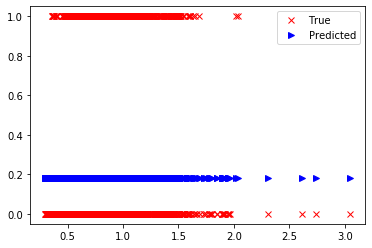

In [37]:
fig, ax = plt.subplots()
ax.plot(x_test['X1'], y_test, 'x', color='red',label='True')
ax.plot(x_test['X1'], (pred_ind_test+0.2)*0.9, '>', color='blue',label='Predicted')
leg = ax.legend()

Plot for dependent feature model(multivariate)

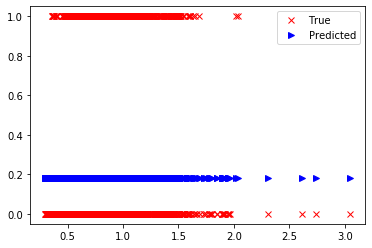

In [38]:
fig, ax = plt.subplots()
ax.plot(x_test['X1'], y_test, 'x', color='red',label='True')
ax.plot(x_test['X1'], (pred_dep_test+0.2)*0.9, '>', color='blue',label='Predicted')
leg = ax.legend()

## Question 8 - Apply one supervised learning approach for classifying the events to normal and anomalies

We will be using KNN supervised algorithm to classify the events as normal or anomaly. Confusion matrix will be used to visualize the performance of the model.

In [39]:
#scaling dataset
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [40]:
model=KNeighborsClassifier()

In [41]:
tracemalloc.start()
snapshot1 = tracemalloc.take_snapshot()
a = datetime.datetime.now()

##########################################
# fitting and prediction
model.fit(x_train,np.ravel(y_train))
prediction = model.predict(x_test)
##########################################

snapshot2 = tracemalloc.take_snapshot()
stats = snapshot2.compare_to(snapshot1,'lineno')
print('Kneighbour')
print("Memory Usage")
for stat in stats[:1]:
    print(stat)
b = datetime.datetime.now()
print('Time complexity', b-a)

Kneighbour
Memory Usage
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: size=2872 KiB (+2281 KiB), count=329 (+4), average=8940 B
Time complexity 0:00:02.208005


In [42]:
cm = confusion_matrix(y_test, prediction)
cm

array([[7696,  170],
       [ 283,  977]], dtype=int64)

In [43]:
score=model.score(x_test, y_test)
score

0.9503616042077581

In [44]:
true_pos=cm[0][0]
true_neg=cm[1][1]
false_pos=cm[0][1]
false_neg=cm[1][0]
accuracy=(true_pos+true_neg)/(false_pos+false_neg)
accuracy

19.14569536423841

In [45]:
precision=true_pos/(true_pos+false_pos)
precision

0.9783879989829647

(2.5, -0.5)

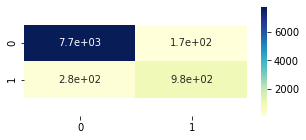

In [46]:
plt.subplots(figsize=(5,2))
ax=sns.heatmap(cm, annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Question 9 - Apply any clustering based algorithm you learn in the class, i.e., (hard and soft clustering with K-means, EM, ..., etc.) to decouple the anomaly data from the normal ones.

K-means clusterring algorithm has been chosen to apply on the dataset to distinguish anomaly data. With help of the Pandas DataFrame head() function, we will quickly check the data and then fill any null values before modeling.

In [47]:
# checking data and filling null values
x=X_n
x.fillna(x.mean())

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.42051,0.73265,6.0160,1.4258,0.22390,0.44638,4.9892,1.3106
1,0.41743,0.72691,6.0102,1.4259,0.21750,0.44326,5.0469,1.3243
2,0.41608,0.72337,6.0093,1.4254,0.21875,0.44661,5.0830,1.3227
3,0.41517,0.72154,6.0002,1.4261,0.23488,0.46345,4.9672,1.3509
4,0.41376,0.71773,5.9814,1.4257,0.25363,0.48208,4.8346,1.3580
...,...,...,...,...,...,...,...,...
152351,0.77400,1.70110,7.1742,3.0244,1.24290,8.21240,21.4700,1.6362
152352,0.76942,1.69400,7.0381,2.9757,1.26660,8.31700,22.1440,1.6047
152353,0.76204,1.67450,6.9004,2.9260,1.24850,8.25700,22.1050,1.5607
152354,0.75973,1.66120,6.7681,2.8843,1.20560,8.12280,21.9780,1.4982


In [48]:
tracemalloc.start()
snapshot1 = tracemalloc.take_snapshot()
a = datetime.datetime.now()

##########################################
#Applying K Means algorithm to the dataset
kmeans5 = KMeans(n_clusters=2)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)
kmeans5.cluster_centers_
# print (y_kmeans5.score())
##########################################

snapshot2 = tracemalloc.take_snapshot()
stats = snapshot2.compare_to(snapshot1,'lineno')
print('K-Means')
print("Memory Usage")
for stat in stats[:1]:
    print(stat)
b = datetime.datetime.now()
print('Time complexity', b-a)

[1 1 1 ... 1 1 1]
K-Means
Memory Usage
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:940: size=595 KiB (+595 KiB), count=2 (+2), average=298 KiB
Time complexity 0:00:04.488037


#### Q10 - Compare the Gaussian-based anomaly detection algorithm, the supervised learning and the clustering approach

Detection Capablities: (Score)
1. Anomalous Model              0.8619329388560159
2. Kneighbour                   0.9503616042077581
3. K-Means                    

Time requirements:
1. Anomalous Model 
 a. Training                     0:00:01.723531
 b. Test(Univariate/Independent) 0:00:00.076968
 c. Test(Multivariate/Dependent) 0:00:00.067554
2. Kneighbour                    0:00:01.806330
3. K-Means                       0:00:04.709879

Memory requirements:
1. Anomalous Model               144 KiB
2. Kneighbour                    2874 KiB
3. K-Means                       144 KiB